##Kyle Braman, Donovan Dutcher, Nathaniel Plummer, William Bange

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the LDA items from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *

from wordcloud import STOPWORDS

In [ ]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')
GTC_V2

,tribunal,id_transcript,case,accused,date,text,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document,url
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Good morning, everybody. Mr. Re...",0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
1,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. HOMETOWU: Thank you, Mr. President. Trial ...",0,Court Proceedings,[UB],1,120,63d0010e97ad59b4cfc62704,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
2,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Appearances, please.",0,JudgeProc,[UB],1,525,63d000fd97ad59b4cfc626ff,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
3,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. WEBSTER: Good morning, Your Honours, and g...",0,LawyerProc,[UB],1,563,63d000f997ad59b4cfc626fd,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
4,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,MR. PRESIDENT: Has Mr. Morley been removed fro...,0,JudgeProc,[UB],1,921,63d0011697ad59b4cfc62707,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52840,ICTY,121002IT,IT-09-92,Ratko Mladic,2012-10-02 00:00:00 UTC,JUDGE ORIE: Could we first ask: What is Zlat...,0,JudgeQA,"[Fadila Tarcin, Mevludin Sejmenovic]",2,47870,63dfae5dc6537d54ff05637b,63df9b11c6537d54ff0561ad,https://www.icty.org/x/cases/mladic/trans/en/1...
52841,ICTY,121002IT,IT-09-92,Ratko Mladic,2012-10-02 00:00:00 UTC,"THE WITNESS: [Interpretation] Well, the most a...",0,Witness,"[Fadila Tarcin, Mevludin Sejmenovic]",2,47988,63dfae57c6537d54ff05637a,63df9b11c6537d54ff0561ad,https://www.icty.org/x/cases/mladic/trans/en/1...
52842,ICTY,121002IT,IT-09-92,Ratko Mladic,2012-10-02 00:00:00 UTC,"JUDGE ORIE: Yes. Mr. Ivetic, we see Zlatiste...",0,JudgeProc,"[Fadila Tarcin, Mevludin Sejmenovic]",2,48246,63dfae61c6537d54ff05637c,63df9b11c6537d54ff0561ad,https://www.icty.org/x/cases/mladic/trans/en/1...
52843,ICTY,121002IT,IT-09-92,Ratko Mladic,2012-10-02 00:00:00 UTC,MR. IVETIC: I was exploring the locations tha...,0,LawyerProc,"[Fadila Tarcin, Mevludin Sejmenovic]",2,48338,63dfae6ac6537d54ff05637e,63df9b11c6537d54ff0561ad,https://www.icty.org/x/cases/mladic/trans/en/1...


In [ ]:
ICTY = GTC_V2.loc[GTC_V2['tribunal']=="ICTY"] #Select data from tribunal ICTY

In [ ]:
text_pipeline = Pipeline([
     ('tokenize', CountVectorizer(max_features=1000, stop_words="english", ngram_range = (1,2))),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=20))
    ]) #Create a pipeline which tokenizes the data, performs a TF-IDF transformation, and applies LDA

In [ ]:
np.random.seed(24601) #Randomize the seed

text_pipeline.fit_transform(ICTY["text"]); #Fit-transform to the text column

In [ ]:
word_list = text_pipeline["tokenize"].get_feature_names_out()
topic_num = 0 #Picking a topic number; Topics are assigned numbers by the code, we have to figure out what they are (not always easy)
num_words = 10 #Picking the number of words to see from that topic

df = pd.DataFrame({"words": word_list, "weights": text_pipeline["lda"].components_[topic_num]}) #Making all of this into a DataFrame

df.sort_values("weights", ascending=False).head(num_words)

,words,weights
302,fluegge,164.219570
411,judge fluegge,163.669240
243,don,131.240858
431,know,124.194914
409,judge,104.019924
244,don know,100.685012
897,tolimir,52.249092
559,mr tolimir,51.539899
540,mr,41.431532
303,fluegge mr,38.098093


In [ ]:
def plot_top_words(pipeline, n_top_words=10, grid_shape=[5,5]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.3, wspace=0.90, hspace=0.1)
    plt.show()

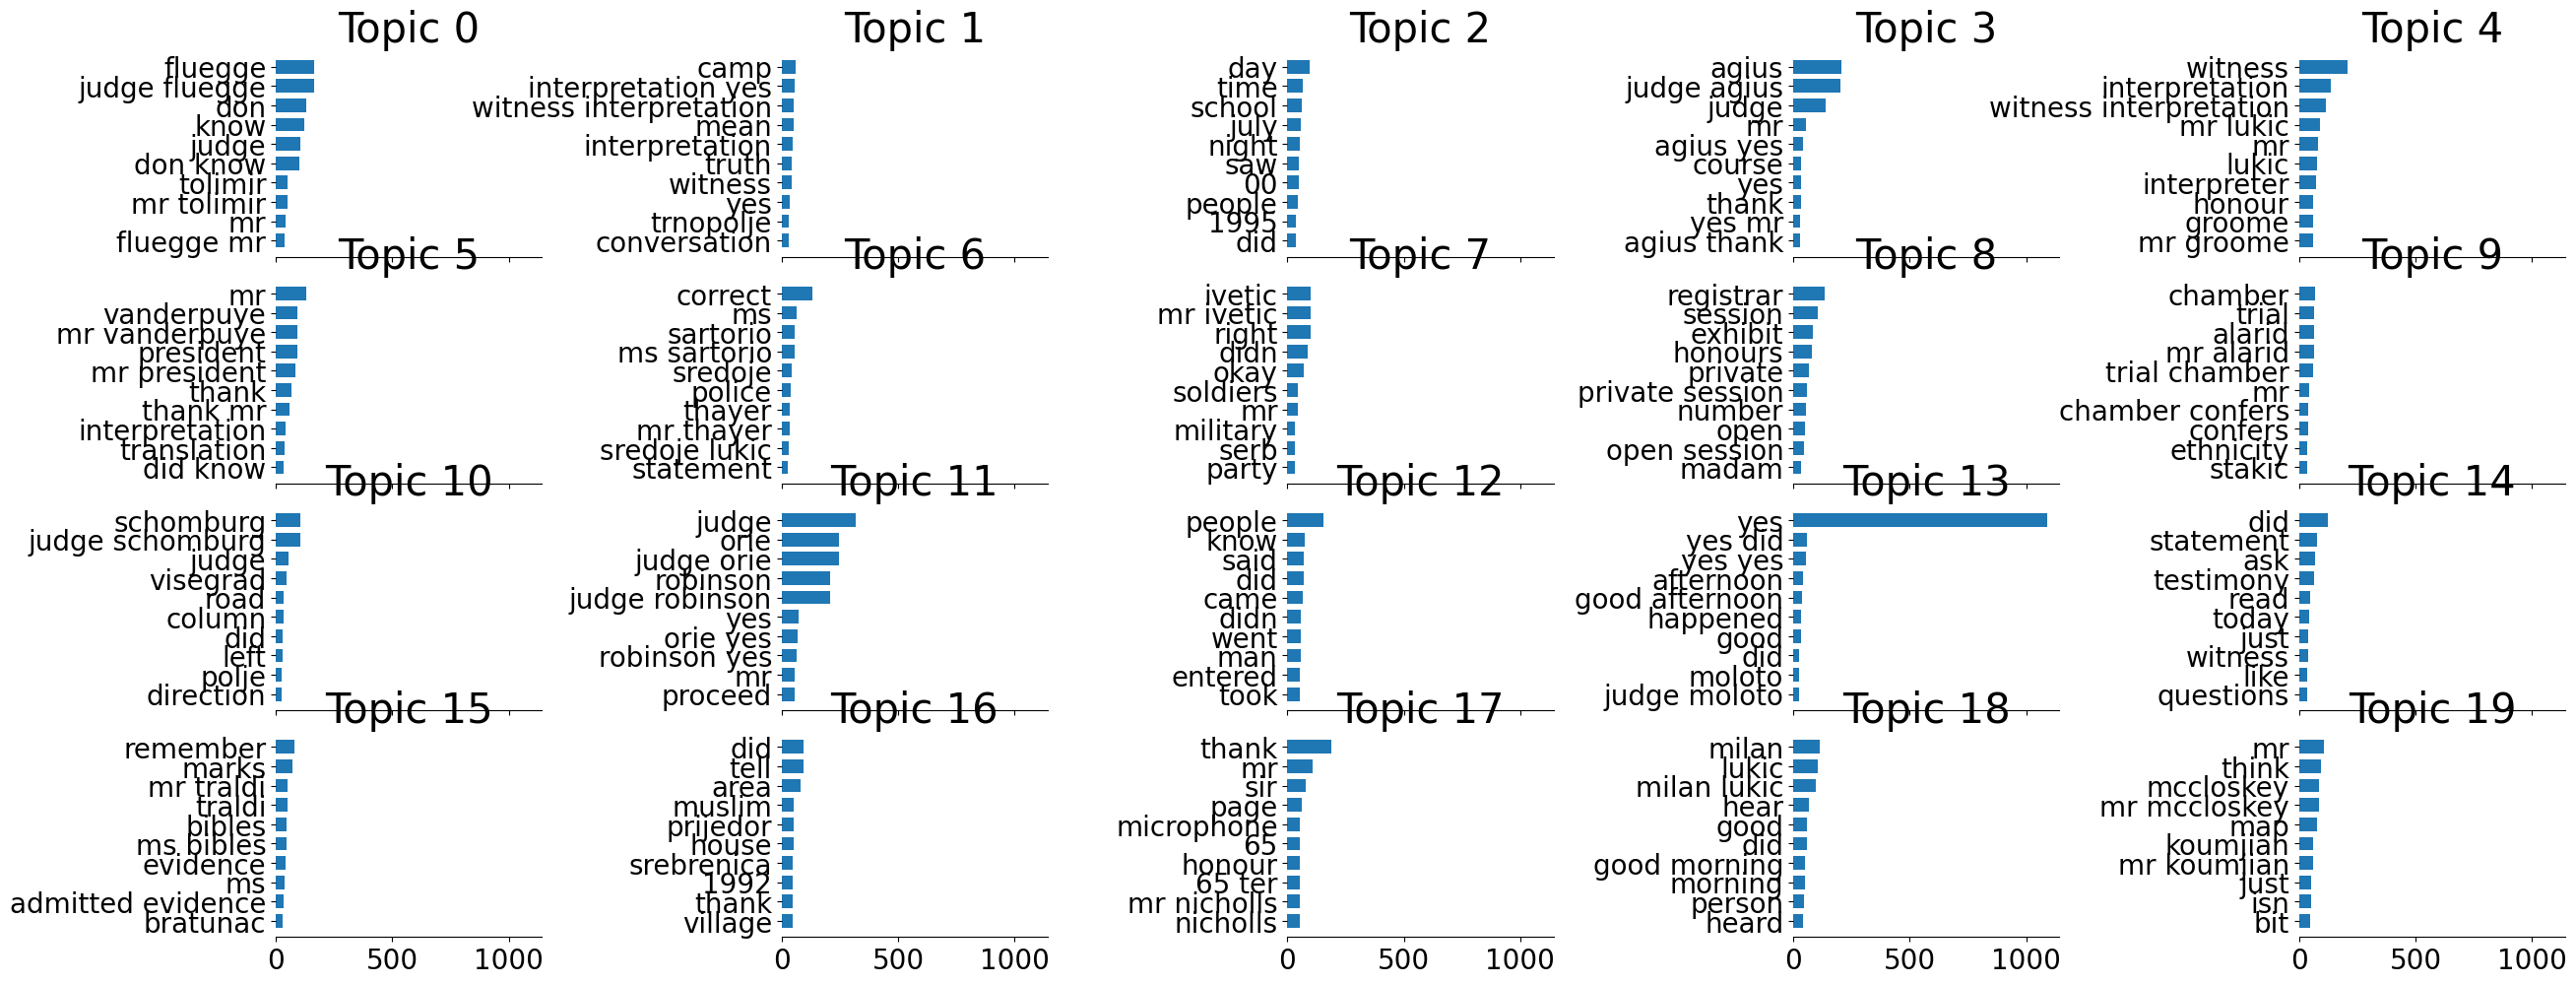

In [ ]:
plot_top_words(text_pipeline, 10, [4,5])